In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter("ignore")

In [2]:
# reading the dataset
df=pd.read_excel(r"C:\Users\anilr\Downloads\Case Study- Innovation Forecasting\Data Set.xlsx",sheet_name='Last 3 year Innovations')

In [3]:
df.head()

,Product,Time,UPC,Category,Sub Category,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity
0,Product #1,"52 Weeks Ending Dec 30, 2018",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Product #1,"52 Weeks Ending Dec 29, 2019",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Product #1,"52 Weeks Ending Dec 27, 2020",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Product #1,"52 Weeks Ending Dec 26, 2021",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Product #1,"52 Weeks Ending Dec 25, 2022",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking null values and datatypes 
#checking shape of data

print(df.info())

print(" Dataset Dimension:",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123300 entries, 0 to 123299
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Product                    123300 non-null  object 
 1   Time                       123300 non-null  object 
 2   UPC                        123300 non-null  int64  
 3   Category                   123300 non-null  object 
 4   Sub Category               123300 non-null  object 
 5   Dollar Sales               21453 non-null   float64
 6   Unit Sales                 21453 non-null   float64
 7   Avg Prc/Unit               21453 non-null   float64
 8   Non Promoted-Avg Prc/Unit  19666 non-null   float64
 9   Promoted Avg Prc/Unit      14958 non-null   float64
 10  Distribution Index         21453 non-null   float64
 11  % Stores                   21453 non-null   float64
 12  Unit Velocity              21453 non-null   float64
dtypes: float64(8), int64(1), obje

In [5]:
# Extract the week value from the date_column
df['Week'] = df['Time'].str.split().str[0]

# Changing the postion of New Column next to the ld field for better understanding
column_to_move = df.pop('Week')
df.insert(df.columns.get_loc('Product') + 1, 'Week',column_to_move)


In [6]:

import re
# Extract and format the date into a new column
df['Format_Time'] = df['Time'].apply(lambda x: re.search(r'\w{3} \d{1,2}, \d{4}$', x).group(0).replace(',', '-'))
#Converting datatype of Format_Time field
df['Format_Time'] = pd.to_datetime(df['Format_Time'], infer_datetime_format=True)


In [7]:
df.head()

,Product,Week,Time,UPC,Category,Sub Category,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity,Format_Time
0,Product #1,52,"52 Weeks Ending Dec 30, 2018",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-30
1,Product #1,52,"52 Weeks Ending Dec 29, 2019",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-29
2,Product #1,52,"52 Weeks Ending Dec 27, 2020",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-27
3,Product #1,52,"52 Weeks Ending Dec 26, 2021",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-26
4,Product #1,52,"52 Weeks Ending Dec 25, 2022",60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-25


In [8]:
# data types has changed
df.dtypes

Product                              object
Week                                 object
Time                                 object
UPC                                   int64
Category                             object
Sub Category                         object
Dollar Sales                        float64
Unit Sales                          float64
Avg Prc/Unit                        float64
Non Promoted-Avg Prc/Unit           float64
Promoted Avg Prc/Unit               float64
Distribution Index                  float64
% Stores                            float64
Unit Velocity                       float64
Format_Time                  datetime64[ns]
dtype: object

In [9]:
# Changing the postion of New Column next to the ld field for better understanding
column_to_move = df.pop('Format_Time')
df.insert(df.columns.get_loc('Time') + 1, 'Format_Time',column_to_move)


In [10]:
df.head()

,Product,Week,Time,Format_Time,UPC,Category,Sub Category,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity
0,Product #1,52,"52 Weeks Ending Dec 30, 2018",2018-12-30,60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Product #1,52,"52 Weeks Ending Dec 29, 2019",2019-12-29,60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Product #1,52,"52 Weeks Ending Dec 27, 2020",2020-12-27,60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Product #1,52,"52 Weeks Ending Dec 26, 2021",2021-12-26,60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Product #1,52,"52 Weeks Ending Dec 25, 2022",2022-12-25,60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Dropping Time Field
df=df.drop("Time",axis=1)

In [12]:
 # Remove duplicate entries based on 'product' and 'date', keeping the last occurrence

df = df.drop_duplicates(subset=['Product', 'Format_Time'], keep='last') 

In [13]:
df.shape

(121050, 14)

In [14]:
df.head()

,Product,Week,Format_Time,UPC,Category,Sub Category,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity
5,Product #1,Building,2023-12-24,60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Product #1,1,2018-01-07,60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Product #1,1,2018-01-14,60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Product #1,1,2018-01-21,60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Product #1,1,2018-01-28,60001152062,GRITS-HOT CEREAL,HOT CEREAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# deleting the all records which all of its features also null
df=df.dropna(subset=['Dollar Sales', 'Unit Sales', 'Avg Prc/Unit',
       'Non Promoted-Avg Prc/Unit', 'Promoted Avg Prc/Unit',
       'Distribution Index', '% Stores', 'Unit Velocity'], how='all')

In [16]:
df.head()

,Product,Week,Format_Time,UPC,Category,Sub Category,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity
489,Product #2,1,2022-01-09,60001145402,GRITS-HOT CEREAL,HOT CEREAL,3.78,2.0,1.890000,1.89,NaN,0.027212,0.021796,2.000000
490,Product #2,1,2022-01-16,60001145402,GRITS-HOT CEREAL,HOT CEREAL,13.23,7.0,1.890000,1.89,NaN,0.087065,0.065388,2.333333
491,Product #2,1,2022-01-23,60001145402,GRITS-HOT CEREAL,HOT CEREAL,4.78,3.0,1.593333,1.89,1.0,0.043179,0.043592,1.500000
492,Product #2,1,2022-01-30,60001145402,GRITS-HOT CEREAL,HOT CEREAL,19.23,13.0,1.479231,1.89,1.0,0.100525,0.087184,3.250000
493,Product #2,1,2022-02-06,60001145402,GRITS-HOT CEREAL,HOT CEREAL,9.67,7.0,1.381429,1.89,1.0,0.072208,0.065388,2.333333


In [17]:
df=df.sort_values(['Product', 'Format_Time'])


In [18]:
df.head()

,Product,Week,Format_Time,UPC,Category,Sub Category,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity
28146,Product #103,1,2021-09-12,60001149122,GRITS-HOT CEREAL,HOT CEREAL,67.50,27.0,2.500000,2.500000,NaN,0.141077,0.130833,4.500000
28147,Product #103,1,2021-09-19,60001149122,GRITS-HOT CEREAL,HOT CEREAL,42423.92,17057.0,2.487185,2.481501,2.494157,26.616783,21.652857,17.177241
28148,Product #103,1,2021-09-26,60001149122,GRITS-HOT CEREAL,HOT CEREAL,55234.47,22226.0,2.485129,2.485536,2.484891,31.639496,25.839512,18.756118
28149,Product #103,1,2021-10-03,60001149122,GRITS-HOT CEREAL,HOT CEREAL,48816.21,19715.0,2.476095,2.486763,2.464991,34.544492,28.194505,15.247486
28150,Product #103,1,2021-10-10,60001149122,GRITS-HOT CEREAL,HOT CEREAL,42889.39,17341.0,2.473294,2.494991,2.448287,35.134148,28.608809,13.217226


In [19]:
df.shape

(20802, 14)

In [20]:
# Fiiling the Null values
df=df.fillna(0)

In [21]:
df.head()

,Product,Week,Format_Time,UPC,Category,Sub Category,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity
28146,Product #103,1,2021-09-12,60001149122,GRITS-HOT CEREAL,HOT CEREAL,67.50,27.0,2.500000,2.500000,0.000000,0.141077,0.130833,4.500000
28147,Product #103,1,2021-09-19,60001149122,GRITS-HOT CEREAL,HOT CEREAL,42423.92,17057.0,2.487185,2.481501,2.494157,26.616783,21.652857,17.177241
28148,Product #103,1,2021-09-26,60001149122,GRITS-HOT CEREAL,HOT CEREAL,55234.47,22226.0,2.485129,2.485536,2.484891,31.639496,25.839512,18.756118
28149,Product #103,1,2021-10-03,60001149122,GRITS-HOT CEREAL,HOT CEREAL,48816.21,19715.0,2.476095,2.486763,2.464991,34.544492,28.194505,15.247486
28150,Product #103,1,2021-10-10,60001149122,GRITS-HOT CEREAL,HOT CEREAL,42889.39,17341.0,2.473294,2.494991,2.448287,35.134148,28.608809,13.217226


In [22]:
# We have few field has 'Building' 
# that ' Building 52 weeks' has modified into Building so we need to replace with 52
df['Week'] = df['Week'].replace('Building', '52')

In [23]:
df.head()

,Product,Week,Format_Time,UPC,Category,Sub Category,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity
28146,Product #103,1,2021-09-12,60001149122,GRITS-HOT CEREAL,HOT CEREAL,67.50,27.0,2.500000,2.500000,0.000000,0.141077,0.130833,4.500000
28147,Product #103,1,2021-09-19,60001149122,GRITS-HOT CEREAL,HOT CEREAL,42423.92,17057.0,2.487185,2.481501,2.494157,26.616783,21.652857,17.177241
28148,Product #103,1,2021-09-26,60001149122,GRITS-HOT CEREAL,HOT CEREAL,55234.47,22226.0,2.485129,2.485536,2.484891,31.639496,25.839512,18.756118
28149,Product #103,1,2021-10-03,60001149122,GRITS-HOT CEREAL,HOT CEREAL,48816.21,19715.0,2.476095,2.486763,2.464991,34.544492,28.194505,15.247486
28150,Product #103,1,2021-10-10,60001149122,GRITS-HOT CEREAL,HOT CEREAL,42889.39,17341.0,2.473294,2.494991,2.448287,35.134148,28.608809,13.217226


In [36]:
df.describe()

,UPC,Dollar Sales,Unit Sales,Avg Prc/Unit,Non Promoted-Avg Prc/Unit,Promoted Avg Prc/Unit,Distribution Index,% Stores,Unit Velocity
count,2.080200e+04,2.080200e+04,2.080200e+04,20802.000000,20802.000000,20802.000000,20802.000000,20802.000000,20802.000000
mean,2.859117e+11,6.511511e+04,2.155849e+04,2.925727,2.712625,1.890088,49.310073,47.051344,6.688613
std,1.815447e+12,1.791317e+05,4.130245e+04,1.622264,1.759140,1.717178,40.065176,39.131087,9.466559
min,6.000002e+10,1.000000e-02,1.000000e+00,0.010000,0.000000,0.000000,0.003050,0.021610,0.505000
25%,6.000063e+10,3.915525e+02,1.690084e+02,2.000000,1.481044,0.000000,1.283958,1.064601,2.963513
50%,6.000112e+10,2.410723e+04,1.027026e+04,2.572009,2.523485,2.089876,53.605867,49.601924,5.000000
75%,6.000114e+10,7.678655e+04,2.859236e+04,3.582105,3.270000,2.670256,90.007005,86.395157,8.241629
max,1.557109e+13,1.181898e+07,2.083533e+06,18.240000,18.240000,13.785000,99.908171,99.956341,1080.000000


### Data Visualization

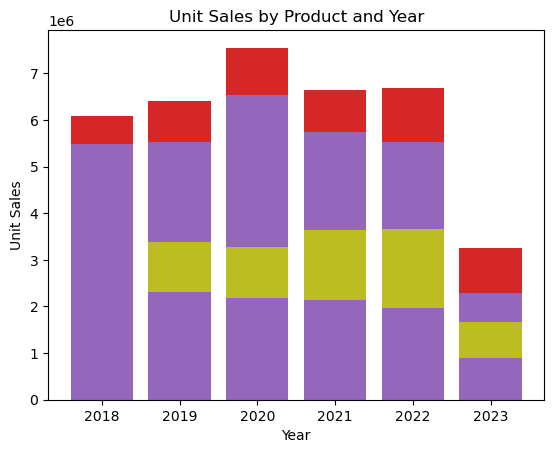

In [48]:
from datetime import datetime


# Extract the year from the "Format_Time" column
df['Year'] = pd.to_datetime(df['Format_Time']).dt.year

unit_sales_agg = df.groupby(['Product','Year'])['Unit Sales'].sum().reset_index()

# Set up the figure and axis
fig, ax = plt.subplots()

# Create the bar plot for each product on each year
for product in unit_sales_agg['Product'].unique():
    product_data = unit_sales_agg[unit_sales_agg['Product'] == product]
    ax.bar(product_data['Year'], product_data['Unit Sales'], label=product)

# Set the labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Unit Sales')
ax.set_title('Unit Sales by Product and Year')
#ax.legend()

# Display the plot
#plt.tight_layout()
plt.show()


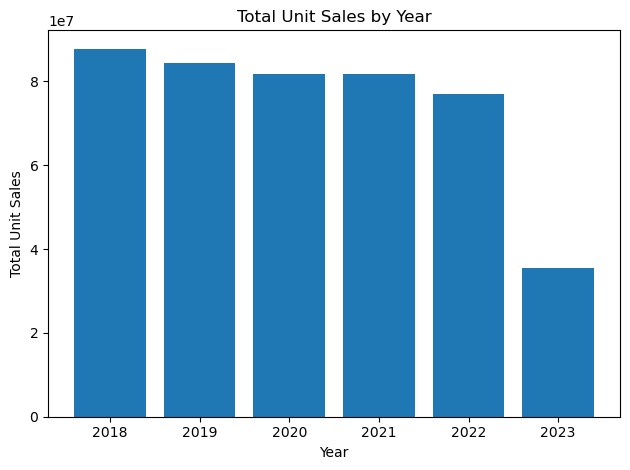

In [64]:

df['Year'] = df['Format_Time'].dt.year

# Group the data by Year and calculate the total unit sales
yearly_sales = df.groupby('Year')['Unit Sales'].sum()

# Set up the figure and axis
fig, ax = plt.subplots()

# Create the bar plot for total unit sales by year
ax.bar(yearly_sales.index, yearly_sales.values)

# Set the labels, title, and axis limits
ax.set_xlabel('Year')
ax.set_ylabel('Total Unit Sales')
ax.set_title('Total Unit Sales by Year')

# Display the plot
plt.tight_layout()
plt.show()








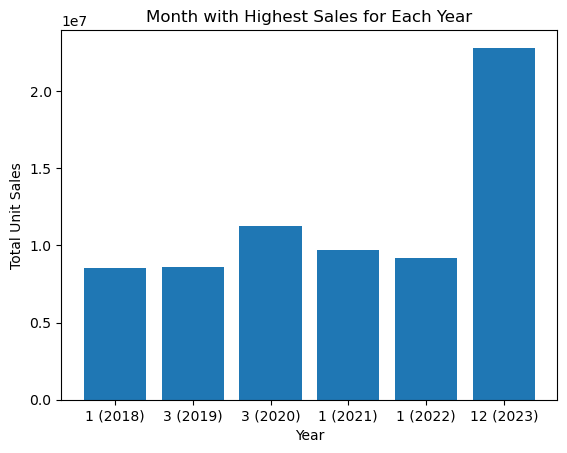

In [68]:
# Extract the year and month from the "Date" column
df['Year'] = df['Format_Time'].dt.year
df['Month'] = df['Format_Time'].dt.month

# Group the data by Year and Month and calculate the total unit sales
monthly_sales = df.groupby(['Year', 'Month'])['Unit Sales'].sum().reset_index()

# Find the month with the highest sales for each year
max_sales_month = monthly_sales.groupby('Year')['Unit Sales'].idxmax()
max_sales_month_data = monthly_sales.loc[max_sales_month]

# Set up the figure and axis
fig, ax = plt.subplots()

# Create the bar plot for the month with the highest sales for each year
ax.bar(max_sales_month_data['Year'], max_sales_month_data['Unit Sales'], tick_label=[f'{m} ({y})' for m, y in zip(max_sales_month_data['Month'], max_sales_month_data['Year'])])

# Set the labels, title, and axis limits
ax.set_xlabel('Year')
ax.set_ylabel('Total Unit Sales')
ax.set_title('Month with Highest Sales for Each Year')

# Display the plot
plt.show()


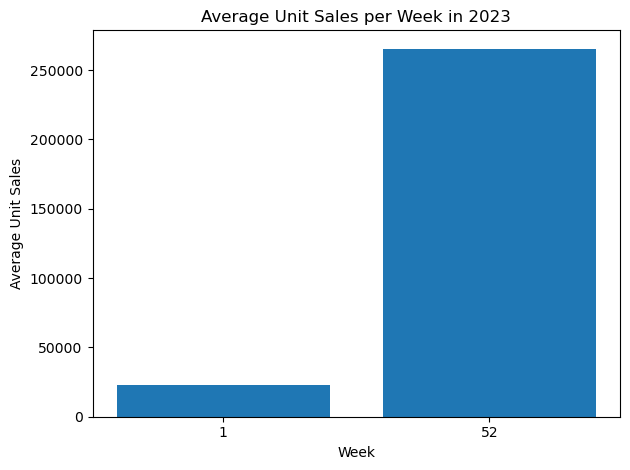

In [84]:
# Filter data for the year 2018
df_2018 = df[df['Format_Time'].dt.year == 2023]

# Calculate the average unit sales for each week in 2018
weekly_average = df_2018.groupby('Week')['Unit Sales'].mean()

# Set up the figure and axis
fig, ax = plt.subplots()

# Create the bar plot for the average unit sales per week
ax.bar(weekly_average.index, weekly_average.values)

# Set the labels, title, and axis limits
ax.set_xlabel('Week')
ax.set_ylabel('Average Unit Sales')
ax.set_title('Average Unit Sales per Week in 2023')

# Display the plot
plt.tight_layout()
plt.show()

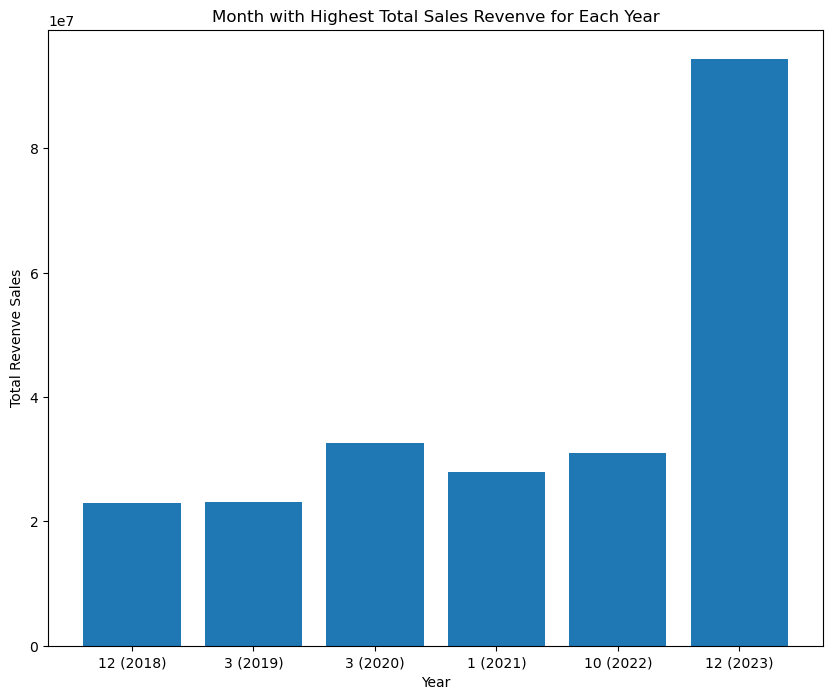

In [72]:
# Extract the year and month from the "Date" column
df['Year'] = df['Format_Time'].dt.year
df['Month'] = df['Format_Time'].dt.month

# Group the data by Year and Month and calculate the total unit sales
monthly_sales = df.groupby(['Year', 'Month'])['Dollar Sales'].sum().reset_index()

# Find the month with the highest sales for each year
max_sales_month = monthly_sales.groupby('Year')['Dollar Sales'].idxmax()
max_sales_month_data = monthly_sales.loc[max_sales_month]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10,8))

# Create the bar plot for the month with the highest sales for each year
ax.bar(max_sales_month_data['Year'], max_sales_month_data['Dollar Sales'], tick_label=[f'{m} ({y})' for m, y in zip(max_sales_month_data['Month'], max_sales_month_data['Year'])])

# Set the labels, title, and axis limits
ax.set_xlabel('Year')
ax.set_ylabel('Total Revenve Sales')
ax.set_title('Month with Highest Total Sales Revenve for Each Year')

# Display the plot
plt.show()


In [25]:
# Savng the dataset into excel 
excel_copy=df.copy()

In [26]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [109]:
df=df.drop(['Year','Month'],axis=1)

In [110]:
df.columns

Index(['Product', 'Week', 'Format_Time', 'UPC', 'Category', 'Sub Category',
       'Dollar Sales', 'Unit Sales', 'Avg Prc/Unit',
       'Non Promoted-Avg Prc/Unit', 'Promoted Avg Prc/Unit',
       'Distribution Index', '% Stores', 'Unit Velocity'],
      dtype='object')

## Model Building
     # Definig target field
     # spliting train test data
     # Building Regression Model
     # Model Evalaution

In [28]:
X=df.drop(['Product','Format_Time','UPC', 'Category', 'Sub Category','Dollar Sales','Unit Sales','% Stores'],axis=1)


In [29]:
X.shape

(20802, 6)

In [30]:
X.columns

Index(['Week', 'Avg Prc/Unit', 'Non Promoted-Avg Prc/Unit',
       'Promoted Avg Prc/Unit', 'Distribution Index', 'Unit Velocity'],
      dtype='object')

In [31]:
Y=df['Unit Sales']

In [32]:
# Standizing the data

from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
X = sd.fit_transform(X.values)
Y=sd.fit_transform(Y.values.reshape(-1,1))

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [34]:
print("Train date=",x_train.shape)
print("Test date=",x_test.shape)
print("Train date=",y_train.shape)
print("Test date=",y_test.shape)

Train date= (14561, 6)
Test date= (6241, 6)
Train date= (14561, 1)
Test date= (6241, 1)


In [85]:
# Linear Regression
le=LinearRegression()
le.fit(x_train,y_train)
le_pred=le.predict(x_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, le_pred)
mae = mean_absolute_error(y_test, le_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 1.9584506948129934
Mean Absolute Error: 0.17843695778257243


In [87]:
# Random Forest Regreesion Model

from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)


RandomForestRegressor(random_state=42)

In [88]:
# Make predictions on the testing set
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.05639591655382467
Mean Absolute Error: 0.010822686566018685


## Based on mse ,RandomForest Regressor gives good model

## Now we have fore cast for next 52 weeks for new product 
        price point of $3.49 and will be on promotion
        Week 6 to Week 9 @ $2.49
          Week 12 to Week 16 @ Buy 1 get 1 Free.
          Remaining Weeks will be at the Regular price

In [89]:

# Generate the dates for the next 52 weeks
dates = pd.date_range(start='2024-01-01', periods=52, freq='W')

# Create a DataFrame to store the sales predictions
predictions = pd.DataFrame({'Date': dates})

# Forecast sales for the new product for the next 52 weeks
new_product_data = pd.DataFrame({
    'Avg Prc/Unit': [3.49],
    'Non Promoted-Avg Prc/Unit':[2.7],
    'Promoted Avg Prc/Unit': [2.49],
    'Distribution Index': [0.8],
    'Unit Velocity': [100]
})

# Make predictions for each week
for week in range(52):
    # Add the week number as a feature to the new product data
    new_product_data['Week'] = week + 1
    
    # Adjust the price and promotion periods based on the specified conditions
    if 6 <= week + 1 <= 9:
        new_product_data['Avg Prc/Unit'] = 2.49
        new_product_data['Promoted Avg Prc/Unit'] = 2.49
    elif 12 <= week + 1 <= 16:
        new_product_data['Avg Prc/Unit'] = 1.745  # Assuming Buy 1 get 1 Free Promotion i.e.half price
        new_product_data['Promoted Avg Prc/Unit'] = 1.745
    
    # Predict the sales for the current week
    sales_prediction = model.predict(new_product_data)
    
    # Store the sales prediction in the DataFrame
    predictions.loc[week, 'Sales'] = sales_prediction[0]

print(predictions)


         Date     Sales
0  2024-01-07  1.243533
1  2024-01-14  2.295460
2  2024-01-21  3.373296
3  2024-01-28  4.344040
4  2024-02-04  5.235793
5  2024-02-11  5.235793
6  2024-02-18  5.235793
7  2024-02-25  5.235793
8  2024-03-03  5.235793
9  2024-03-10  5.235793
10 2024-03-17  5.235793
11 2024-03-24  5.235793
12 2024-03-31  5.235793
13 2024-04-07  5.235793
14 2024-04-14  5.235793
15 2024-04-21  5.235793
16 2024-04-28  5.235793
17 2024-05-05  5.235793
18 2024-05-12  5.235793
19 2024-05-19  5.235793
20 2024-05-26  5.235793
21 2024-06-02  5.235793
22 2024-06-09  5.235793
23 2024-06-16  5.235793
24 2024-06-23  5.235793
25 2024-06-30  5.235793
26 2024-07-07  5.235793
27 2024-07-14  5.235793
28 2024-07-21  5.235793
29 2024-07-28  5.235793
30 2024-08-04  5.235793
31 2024-08-11  5.235793
32 2024-08-18  5.235793
33 2024-08-25  5.235793
34 2024-09-01  5.235793
35 2024-09-08  5.235793
36 2024-09-15  5.235793
37 2024-09-22  5.235793
38 2024-09-29  5.235793
39 2024-10-06  5.235793
40 2024-10-13  5

In [94]:
# creating excelfile topresent excel output
results = pd.DataFrame(predictions, columns=['Price', 'Promotion', 'Category', 'Sub-category'])
results['Predicted Sales Volume'] =predictions['Sales']
results['Revenue'] = results['Predicted Sales Volume'] * results['Price']
results['Profitability'] = results['Revenue'] - 100  # Adjust costs as necessary
results['MAE'] = mae
results['RMSE'] = rmse
#results.to_excel('sales_predictions.xlsx', index=False)

### Feature Importance

In [112]:
X1=df.drop(['Format_Time','Unit Sales'],axis=1)

In [113]:
X1.columns

Index(['Product', 'Week', 'UPC', 'Category', 'Sub Category', 'Dollar Sales',
       'Avg Prc/Unit', 'Non Promoted-Avg Prc/Unit', 'Promoted Avg Prc/Unit',
       'Distribution Index', '% Stores', 'Unit Velocity'],
      dtype='object')

In [114]:
lb=LabelEncoder()
X1['Product']=lb.fit_transform(X1['Product'])
#X1
X1['Category']=lb.fit_transform(X1['Category'])
X1['Sub Category']=lb.fit_transform(X1['Sub Category'])

In [97]:
Y1=df['Unit Sales']

In [100]:
# Standizing the data

from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
X1 = sd.fit_transform(X1.values)
Y1=sd.fit_transform(Y1.values.reshape(-1,1))

In [115]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X1,Y1,test_size=0.3,random_state=42)

In [116]:
from sklearn.ensemble import RandomForestRegressor


modelr = RandomForestRegressor(n_estimators=100, random_state=42)
modelr.fit(x1_train,y1_train)

RandomForestRegressor(random_state=42)

In [117]:
# Make predictions on the testing set
from sklearn.metrics import mean_squared_error, mean_absolute_error
y1_pred = modelr.predict(x1_test)

# Evaluate the model
mse = mean_squared_error(y1_test, y1_pred)
mae = mean_absolute_error(y1_test, y1_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 0.09573741936748731
Mean Absolute Error: 0.011911500248404084


In [118]:

# Get the feature importances
importance = modelr.feature_importances_
features=['Product', 'Week', 'UPC', 'Category', 'Sub Category', 'Dollar Sales',
       'Avg Prc/Unit', 'Non Promoted-Avg Prc/Unit', 'Promoted Avg Prc/Unit',
       'Distribution Index', '% Stores', 'Unit Velocity']
# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'Feature': features ,'Importance': importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                      Feature  Importance
5                Dollar Sales    0.386069
10                   % Stores    0.310517
11              Unit Velocity    0.223247
1                        Week    0.040341
9          Distribution Index    0.032295
8       Promoted Avg Prc/Unit    0.001705
6                Avg Prc/Unit    0.001593
0                     Product    0.001560
7   Non Promoted-Avg Prc/Unit    0.001441
2                         UPC    0.001231
3                    Category    0.000000
4                Sub Category    0.000000


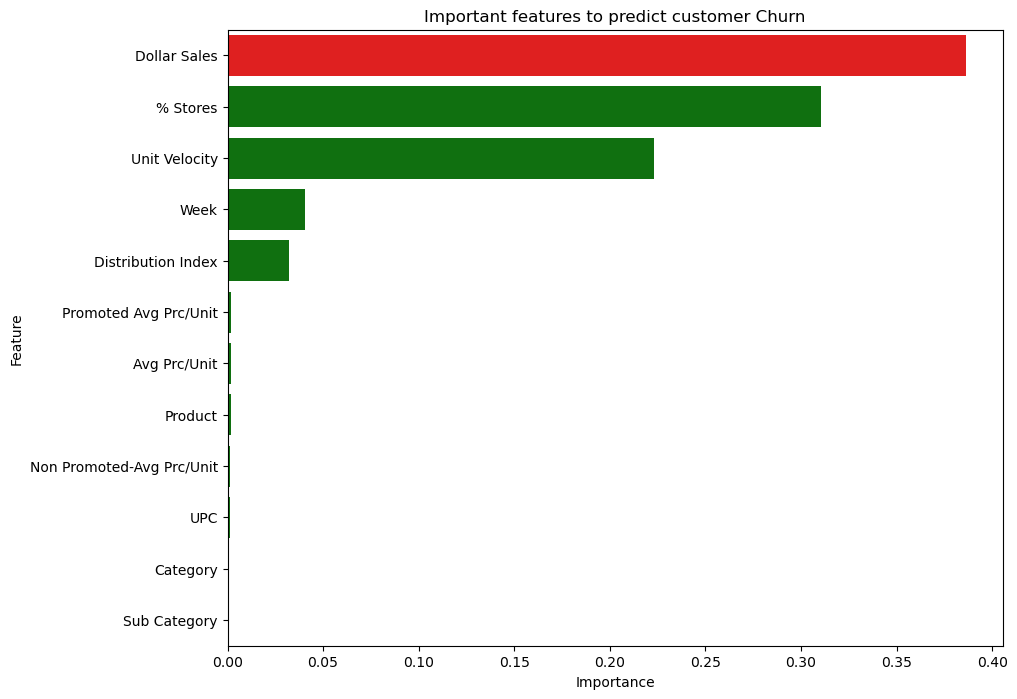

In [119]:
values = feature_importance_df.Importance    
idx = feature_importance_df.Feature
plt.figure(figsize=(10,8))
clrs = ['green' if (x < max(values)) else 'red' for x in values ]
sns.barplot(y=idx,x=values,palette=clrs).set(title='Important features to predict customer Churn')
plt.show()

In [120]:

# Generate the dates for the next 52 weeks
dates = pd.date_range(start='2024-01-01', periods=52, freq='W')

# Create a DataFrame to store the sales predictions
predictions = pd.DataFrame({'Date': dates})


# Forecast sales for the new product for the next 52 weeks
new_product_data = pd.DataFrame({
    'Product':[1100], 'Week':[1], 'UPC':[60001149122], 'Category':[0], 
    'Sub Category':[0], 'Dollar Sales':[6.5],
      
    
    'Avg Prc/Unit': [3.49],
    'Non Promoted-Avg Prc/Unit':[3.49],
    'Promoted Avg Prc/Unit': [2.49],
    'Distribution Index': [0.8],
     '% Stores':[49.0],
    'Unit Velocity': [100]
    

})


# Make predictions for each week
for week in range(52):
    # Add the week number as a feature to the new product data
    new_product_data['Week'] = week + 1
    
    # Adjust the price and promotion periods based on the specified conditions
    if 6 <= week + 1 <= 9:
        new_product_data['Avg Prc/Unit'] = 2.49
        new_product_data['Promoted Avg Prc/Unit'] = 2.49
    elif 12 <= week + 1 <= 16:
        new_product_data['Avg Prc/Unit'] = 0  # Assuming Buy 1 get 1 Free promotion
        new_product_data['Promoted Avg Prc/Unit'] = 0
    
    # Predict the sales for the current week
    sales_prediction = modelr.predict(new_product_data)
    
    # Store the sales prediction in the DataFrame
    predictions.loc[week, 'Sales'] = sales_prediction[0]

print(predictions)


         Date     Sales
0  2024-01-07 -0.368936
1  2024-01-14 -0.368936
2  2024-01-21 -0.368936
3  2024-01-28 -0.368936
4  2024-02-04 -0.368936
5  2024-02-11 -0.368217
6  2024-02-18 -0.368217
7  2024-02-25 -0.368217
8  2024-03-03 -0.368217
9  2024-03-10 -0.368217
10 2024-03-17 -0.368217
11 2024-03-24 -0.357500
12 2024-03-31 -0.357500
13 2024-04-07 -0.357500
14 2024-04-14 -0.357500
15 2024-04-21 -0.357500
16 2024-04-28 -0.357500
17 2024-05-05 -0.357500
18 2024-05-12 -0.357500
19 2024-05-19 -0.357500
20 2024-05-26 -0.357500
21 2024-06-02 -0.357500
22 2024-06-09 -0.357500
23 2024-06-16 -0.357500
24 2024-06-23 -0.357500
25 2024-06-30 -0.357500
26 2024-07-07 -0.357500
27 2024-07-14 -0.357500
28 2024-07-21 -0.357500
29 2024-07-28 -0.357500
30 2024-08-04 -0.357500
31 2024-08-11 -0.357500
32 2024-08-18 -0.357500
33 2024-08-25 -0.357500
34 2024-09-01 -0.357500
35 2024-09-08 -0.357500
36 2024-09-15 -0.357500
37 2024-09-22 -0.357500
38 2024-09-29 -0.357500
39 2024-10-06 -0.357500
40 2024-10-13 -0